# メトロポリス（Metropolis）法

## Problem
30人の学生について、5教科の共通学力テストを行い、その平均点を次のように得た。

6.0, 10.0, 7.6, 3.5, 1.4, 2.5, 5.6, 3.0, 2.2, 5.0, 3.3, 7.6, 5.8, 6.7, 2.8, 4.8, 6.3, 5.3, 5.4, 3.3, 3.4, 3.8, 3.3, 5.7, 6.3, 8.4, 4.6, 2.8, 7.9, 8.9

これから全国の学生の平均点muと分散sigma^2の分布を求める。なお、作問者は平均点が5点になることを想定して問題を作っているとする

## Reference
涌井良幸. 道具としてのベイズ統計. 日本実業出版社. 2009，pp.160-175


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
# メトロポリス法の実施に必要なパラメータは求まっているものとする
m1 = 30.25
mu_1 = 5.105785123967
n1 = 30.02
n1s1 = 138.2414876033

In [3]:
def calc_probability(mu, sigma):
    ret = (sigma ** (-n1 - 3)) * np.exp(
        -(n1s1 + (m1 * ((mu - mu_1) ** 2))) / (2 * (sigma ** 2)))
    return ret

average(mu[burn_in:])   : 5.103844012599845
average(sigma[burn_in:]): 4.646300538311227


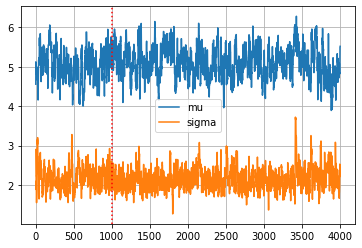

In [4]:
length = 4000
burn_in = 1000
mu_current= 5.0  # 初期値に5.0を設定
sigma_current = 3.0 # 初期値に3.0を設定
log_mu = np.zeros(length)
log_sigma = np.zeros(length)

for i in range(length):
    # p(x_t)を計算
    p_current = calc_probability(mu_current, sigma_current)
    # 候補としてxに乱数加えたものを作成
    mu_candidate = mu_current - np.random.normal(0, 0.25, 1)
    sigma_candidate = sigma_current - np.random.normal(0, 0.25, 1)
    # p(x')を計算
    p_candidate = calc_probability(mu_candidate, sigma_candidate)
    # 現在値と候補値の比率p(x')/p(x_t)を計算
    alpha = p_candidate / p_current
    # alphas >= 1 なら値を更新
    thresh = np.random.uniform(0, 1)
    if alpha >= 1:
        mu_current = mu_candidate
        sigma_current = sigma_candidate
    else:
        # 乱数 >= 1 なら値を更新
        thresh = np.random.uniform(0, 1)
        if alpha >= thresh:
            mu_current = mu_candidate
            sigma_current = sigma_candidate
        else:
            pass
    log_mu[i] = mu_current
    log_sigma[i] = sigma_current
print("average(mu[burn_in:])   :", np.average(log_mu[burn_in:]))
print("average(sigma[burn_in:]):", np.average(log_sigma[burn_in:])**2)
plt.plot(range(len(log_mu)), log_mu, label="mu")
plt.plot(range(len(log_sigma)), log_sigma, label="sigma")
plt.axvline(x=burn_in, ymin=0, ymax=10, c="red", linestyle="dotted")
# plt.plot(range(burn_in,len(log_mu)), log_mu[burn_in:], label="mu")
# plt.plot(range(burn_in,len(log_sigma)), log_sigma[burn_in:], label="sigma")
plt.grid(True)
plt.legend()
plt.show()